In [16]:
import csv
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pylab as pb
import seaborn as sns
from scipy import stats

%matplotlib inline

# New Scatter Plots from unrestricted data

** This notebook contains the code to generate scatterplots from job (firm-worker pair) level, grouped in bins and averaged to sort of the amount of noise in previous scatterplots.**

This notebook uses the file *PD05_wage.csv* as source.Ir contains all the pairs worker-job for which there exists profits and size information.

In [17]:
# Opening data
with open('PD05_wage.csv', 'rb') as f:
    reader = csv.reader(f)
    data05 = list(reader)

In [148]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
firmID05 = []
size05 = []
wage05 = []
profit05 = []
skill_w05 = []
firm_age05 = []
industry_code05 = []
region05 = []
for row in data05[1:]:
    firmID05.append(row[0])
    size05.append(int(row[1]))
    wage05.append(float(row[2]))
    profit05.append(float(row[3]))
    skill_w05.append(float(row[4]))
    if row[5]== '':
        firm_age05.append(0)
    else:
        firm_age05.append(float(row[5]))
    if row[6]== '':
        industry_code05.append(0)
    else:
        industry_code05.append(int(row[6]))
    region05.append(int(row[7]))
# Firm unique code (string)
firmID05 = np.asarray(firmID05)
# Firm size in workers (int)
size05 = np.asarray(size05)
# Daily average wage for each firm, in euros (float)
wage05 = np.asarray(wage05)
# Declared average profits for each firm per year, in euros (float)
profit05 = np.asarray(profit05)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w05 = np.asarray(skill_w05)
# Firm age in years (float) Missing observations have a 0.
firm_age05 = np.asarray(firm_age05)
# Industry codes (int) Missing observations have a 0.
industry_code05 = np.asarray(industry_code05)
# Regional code (int)
region05 = np.asarray(region05)

print "Sample size: "+str(len(firmID05))

Sample size: 73544


## Part I: Sample of old-style scatterplots

Old scatterplots just plot the data points from raw data. Given the big size of the sample (73,544 observations), and some noisy observations, the resulting scatter plots are terrible. Take a look...

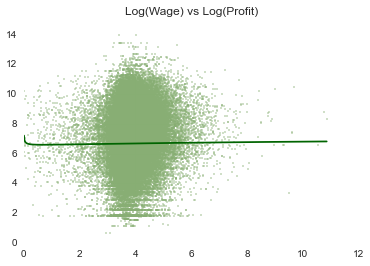

Slope(s):0.0230270333102  0.0287481066632


In [59]:
# Wage vs Log(Profit)
wage_range = np.linspace(min(np.log(wage05)), max(np.log(wage05)), 1000)
plt.scatter(np.log(wage05), np.log(profit05), color='sage', s=1.0)
n, m, b = np.polyfit(np.log(wage05), np.log(profit05), 2)
plt.plot(wage_range, n*np.log(wage_range)**2 + m*np.log(wage_range) + b, '-', c='darkgreen')
plt.ylim(0,15)
plt.xlim(0,12)
plt.title('Log(Wage) vs Log(Profit)')
plt.show()
print 'Slope(s):'+str(m)+"  "+str(n)

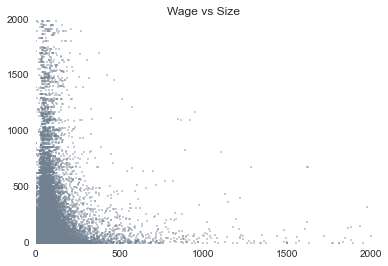

Slope(s): 0.132704582824 -1.02362489931e-05 1.5366822749e-10


In [80]:
# Wage vs Log(Profit)
wage_range = np.linspace(min(wage05), max(wage05), 1000)
plt.scatter(wage05, size05, color='slategrey', s=1.0)
n3, n, m, b = np.polyfit(wage05, size05 ,3)
#plt.plot(wage_range, n3*wage_range**3 + n*wage_range**2 + wage_range*m + b, '-', c='black')
plt.ylim(0,2000)
plt.xlim(0,2000)
plt.title('Wage vs Size')
plt.show()
print 'Slope(s):', m, n, n3

## Part II: New scatterplots

The idea is to group wages/size/profits in bins, and then calculate the average of those bins. Being then the average of an average, weexpect the noise from previous plots to be significantly reduced.

In [129]:
wage_bins = np.arange(0,1000,20)
wage_data = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if wage05[j]<wage_bins[i] and wage05[j]>= wage_bins[i-1]:
            bufferr.append(size05[j])
    wage_data.append(np.mean(bufferr))

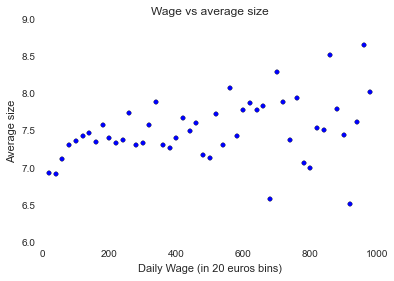

In [142]:
plt.scatter(wage_bins[1:], wage_data)
plt.ylabel("Average size")
plt.xlabel("Daily Wage (in 20 euros bins)")
plt.xlim(0,1000)
plt.title("Wage vs average size")
plt.show()

In [140]:
size_bins = np.arange(0,500,10)
size_data = []
for i in range(1, len(size_bins)):
    bufferr = []
    for j in range(len(size05)):
        if size05[j]<size_bins[i] and size05[j]>= size_bins[i-1]:
            bufferr.append(wage05[j])
    size_data.append(np.mean(bufferr))

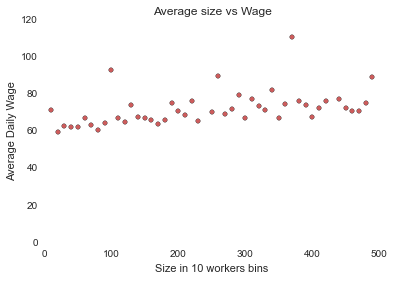

In [150]:
plt.scatter(size_bins[1:], size_data, c="indianred")
plt.xlabel("Size in 10 workers bins")
plt.ylabel("Average Daily Wage")
plt.xlim(0,500)
plt.ylim(0,120)
plt.title("Average size vs Wage")
plt.show()

In [133]:
size_bins = np.arange(0,500,10)
size_data = []
for i in range(1, len(size_bins)):
    bufferr = []
    for j in range(len(size05)):
        if size05[j]<size_bins[i] and size05[j]>= size_bins[i-1]:
            bufferr.append(profit05[j])
    size_data.append(np.mean(bufferr))

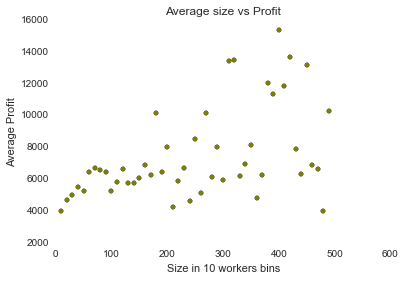

In [139]:
plt.scatter(size_bins[1:], size_data, c="olive")
plt.xlabel("Size in 10 workers bins")
plt.ylabel("Average Profit")
plt.xlim(0,600)
plt.title("Average size vs Profit")
plt.show()

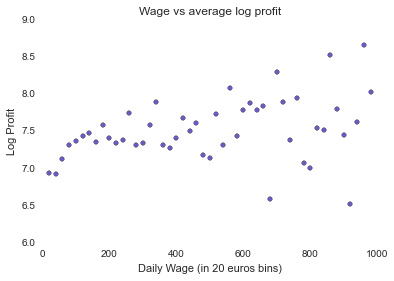

In [138]:
wage_bins = np.arange(0,1000,20)
wage_data = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if wage05[j]<wage_bins[i] and wage05[j]>= wage_bins[i-1]:
            bufferr.append(np.log(profit05[j]))
    wage_data.append(np.mean(bufferr))
    
plt.scatter(wage_bins[1:], wage_data, c='slateblue')
plt.ylabel("Log Profit")
plt.xlabel("Daily Wage (in 20 euros bins)")
plt.xlim(0,1000)
plt.title("Wage vs average log profit")
plt.show()

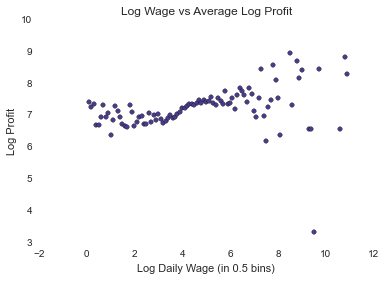

In [137]:
wage_bins = np.arange(0,12,0.1)
wage_data = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if np.log(wage05[j])<wage_bins[i] and np.log(wage05[j])>= wage_bins[i-1]:
            bufferr.append(np.log(profit05[j]))
    wage_data.append(np.mean(bufferr))
    
plt.scatter(wage_bins[1:], wage_data, c='darkslateblue')
plt.ylabel("Log Profit")
plt.xlabel("Log Daily Wage (in 0.5 bins)")
plt.title("Log Wage vs Average Log Profit")
plt.show()